There are n dominoes in a line, and we place each domino vertically upright. In the beginning, we simultaneously push some of the dominoes either to the left or to the right.

After each second, each domino that is falling to the left pushes the adjacent domino on the left. Similarly, the dominoes falling to the right push their adjacent dominoes standing on the right.

When a vertical domino has dominoes falling on it from both sides, it stays still due to the balance of the forces.

For the purposes of this question, we will consider that a falling domino expends no additional force to a falling or already fallen domino.

You are given a string dominoes representing the initial state where:

    dominoes[i] = 'L', if the ith domino has been pushed to the left,
    dominoes[i] = 'R', if the ith domino has been pushed to the right, and
    dominoes[i] = '.', if the ith domino has not been pushed.

Return a string representing the final state.

 

Example 1:

Input: dominoes = "RR.L"
Output: "RR.L"
Explanation: The first domino expends no additional force on the second domino.

Example 2:

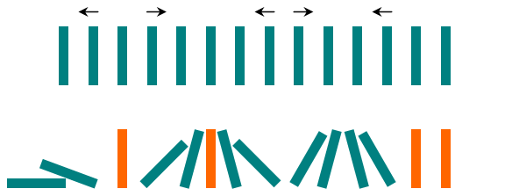

Input: dominoes = ".L.R...LR..L.."
Output: "LL.RR.LLRRLL.."

 

Constraints:

    n == dominoes.length
    1 <= n <= 105
    dominoes[i] is either 'L', 'R', or '.'.



In [78]:
class Solution:
    def pushDominoes(self, dominoes: str) -> str:
        dominoes = list(dominoes)
        i = 0
        while i < len(dominoes):
            if dominoes[i] != '.':
                i += 1
            else:
                l = i - 1
                r = i + 1
                while r < len(dominoes):
                    if dominoes[r] != '.':
                        break
                    else:
                        r += 1
                    
                if l < 0:
                    left = "L"
                else:
                    left = dominoes[l]
                if r >= len(dominoes):
                    right = "R"
                else:
                    right = dominoes[r]

                if left == right:
                    dominoes[l + 1:r] = [left] * (r - l - 1)
                else:
                    if left == "R" and right == "L":
                        k = l + 1
                        l = r - 1
                        while l - k > 0:
                            dominoes[k] = left
                            dominoes[l] = right
                            k += 1
                            l -= 1

                i = r
            
            
        return ''.join(dominoes)

In [ ]:
class Solution(object):
    def pushDominoes(self, dominoes):
        N = len(dominoes)
        force = [0] * N

        # Populate forces going from left to right
        f = 0
        for i in xrange(N):
            if dominoes[i] == 'R': f = N
            elif dominoes[i] == 'L': f = 0
            else: f = max(f-1, 0)
            force[i] += f

        # Populate forces going from right to left
        f = 0
        for i in xrange(N-1, -1, -1):
            if dominoes[i] == 'L': f = N
            elif dominoes[i] == 'R': f = 0
            else: f = max(f-1, 0)
            force[i] -= f

        return "".join('.' if f==0 else 'R' if f > 0 else 'L'
                       for f in force)

In [ ]:
class Solution:
    def pushDominoes(self, dominoes: str) -> str:
        n = len(dominoes)
        l = [-1] * n
        r = [-1] * n
        ans = ["." for _ in range(n)]
        curr_l = -1
        curr_r = -1
        for i in range(n):
            if dominoes[i] == "R":
                curr_r = 0
            elif dominoes[i] == "L":
                curr_r = -1
            elif curr_r >= 0:
                curr_r += 1
            r[i] = curr_r
            if dominoes[n - 1 - i] == "L":
                curr_l = 0
            elif dominoes[n - 1 - i] == "R":
                curr_l = -1
            elif curr_l >= 0:
                curr_l += 1
            l[n - 1 - i] = curr_l
        for i in range(n):
            if r[i] >= 0 and l[i] >= 0:
                if r[i] < l[i]:
                    ans[i] = "R"
                elif r[i] > l[i]:
                    ans[i] = "L"
            else:
                if r[i] >= 0:
                    ans[i] = "R"
                elif l[i] >= 0:
                    ans[i] = "L"
        print(r, l, ans)
        return "".join(ans)
        

In [79]:
s = Solution()
s.pushDominoes('RR.L') # 'RR.L'

'RR.L'

In [80]:
s.pushDominoes(".L.R...LR..L..") #  "LL.RR.LLRRLL.."

'LL.RR.LLRRLL..'